In [1]:
from zipfile import ZipFile
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import shutil
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
breed_list = os.listdir("../archive/images/Images/")
standard_path = "../archive/images/Images/"
validation_path = "../archive/images/validations/"
train_path = "../archive/images/train/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with ZipFile("/content/drive/MyDrive/dogs_images/archive.zip", 'r') as zip_ref:
  zip_ref.extractall("/archive")

In [ ]:
from pprint import pprint
label_maps = {}
label_maps_rev = {}
for i, v in enumerate(breed_list):
    label_maps.update({v: i})
    label_maps_rev.update({i : v})

pprint(label_maps)
pprint(label_maps_rev)


In [ ]:
# Création du path des images de validation
paths = []
labels = []
targets = []
for breed in breed_list:
    base_name = os.path.join(standard_path, breed)
    os.mkdir(os.path.join(validation_path, breed))




In [ ]:
# Création du path des images de train
paths = []
labels = []
targets = []
for breed in breed_list:
    base_name = os.path.join(standard_path, breed)
    os.mkdir(os.path.join(train_path, breed))


In [ ]:
# Duplicata des images de validations
for breed in breed_list:
    base_name = os.path.join(standard_path, breed)
    count = 0
    for img_name in os.listdir(base_name):
      if count > 29:
        break
      shutil.copy2(os.path.join(base_name, img_name), os.path.join(validation_path, breed))
      count+=1

In [ ]:
# for vl in os.listdir(validation_path):
#   base_name = os.path.join(validation_path, vl)
#   for rm in os.listdir(base_name):
#     os.remove(os.path.join(base_name, rm))

In [ ]:
# Duplicata des images de train
for breed in breed_list:
    base_name = os.path.join(standard_path, breed)
    count = 0
    for img_name in os.listdir(base_name):
      if count > 99:
        break
      shutil.copy2(os.path.join(base_name, img_name), os.path.join(train_path, breed))
      count+=1

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.0)
val_datagen = ImageDataGenerator(rescale=1./255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_path,
    target_size = (150, 150),
    batch_size = 15,
    class_mode = 'categorical'
)

Found 12000 images belonging to 120 classes.
Found 3600 images belonging to 120 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(120,activation = 'softmax')
])



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=600,# 2000 images = batch_size * steps
    epochs=50,
    validation_data=validation_generator,
    validation_steps=240 # 1000 images = batch_size * steps
)

Epoch 1/50
600/600 [==============================] - 55s 92ms/step - loss: 0.0442 - acc: 0.0570
Epoch 2/50
600/600 [==============================] - 55s 92ms/step - loss: 0.0431 - acc: 0.0717
Epoch 3/50
600/600 [==============================] - 55s 92ms/step - loss: 0.0420 - acc: 0.0962
Epoch 4/50
600/600 [==============================] - 55s 92ms/step - loss: 0.0410 - acc: 0.1167
Epoch 5/50
600/600 [==============================] - 55s 92ms/step - loss: 0.0401 - acc: 0.1429
Epoch 6/50
600/600 [==============================] - 56s 94ms/step - loss: 0.0393 - acc: 0.1707
Epoch 7/50
600/600 [==============================] - 55s 92ms/step - loss: 0.0384 - acc: 0.1902
Epoch 8/50
600/600 [==============================] - 56s 93ms/step - loss: 0.0376 - acc: 0.2216
Epoch 9/50
600/600 [==============================] - 56s 93ms/step - loss: 0.0370 - acc: 0.2449
Epoch 10/50
600/600 [==============================] - 56s 93ms/step - loss: 0.0363 - acc: 0.2643
Epoch 11/50
600/600 [========

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

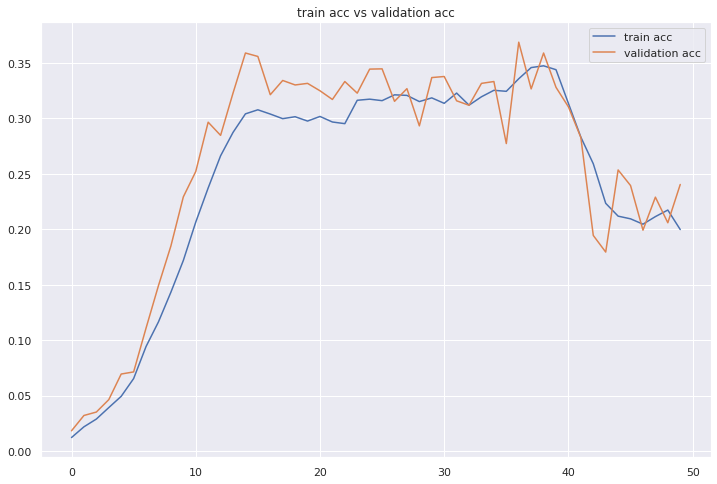

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

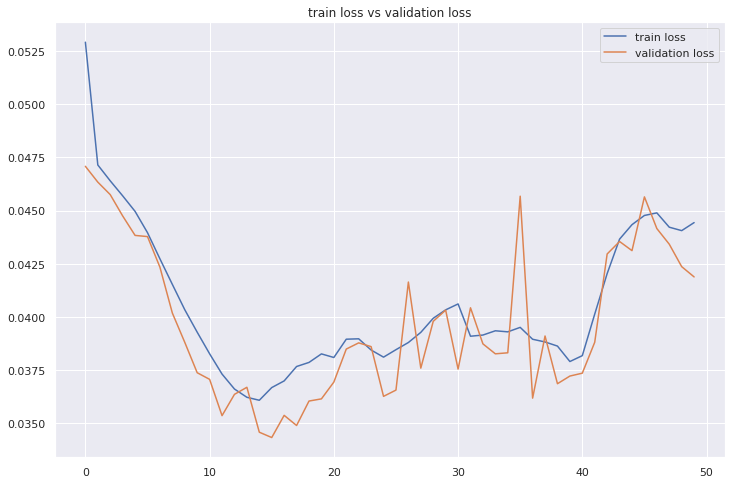

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

## Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/archive/images/validations/n02085620-Chihuahua/n02085620_1321.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

In [ ]:
model.predict(x)

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        5.230615e-24, 0.000000e+00, 0.00

In [ ]:
train_generator.class_indices

{'n02085620-Chihuahua': 0,
 'n02085782-Japanese_spaniel': 1,
 'n02085936-Maltese_dog': 2,
 'n02086079-Pekinese': 3,
 'n02086240-Shih-Tzu': 4,
 'n02086646-Blenheim_spaniel': 5,
 'n02086910-papillon': 6,
 'n02087046-toy_terrier': 7,
 'n02087394-Rhodesian_ridgeback': 8,
 'n02088094-Afghan_hound': 9,
 'n02088238-basset': 10,
 'n02088364-beagle': 11,
 'n02088466-bloodhound': 12,
 'n02088632-bluetick': 13,
 'n02089078-black-and-tan_coonhound': 14,
 'n02089867-Walker_hound': 15,
 'n02089973-English_foxhound': 16,
 'n02090379-redbone': 17,
 'n02090622-borzoi': 18,
 'n02090721-Irish_wolfhound': 19,
 'n02091032-Italian_greyhound': 20,
 'n02091134-whippet': 21,
 'n02091244-Ibizan_hound': 22,
 'n02091467-Norwegian_elkhound': 23,
 'n02091635-otterhound': 24,
 'n02091831-Saluki': 25,
 'n02092002-Scottish_deerhound': 26,
 'n02092339-Weimaraner': 27,
 'n02093256-Staffordshire_bullterrier': 28,
 'n02093428-American_Staffordshire_terrier': 29,
 'n02093647-Bedlington_terrier': 30,
 'n02093754-Border_terr